## 산점도로 이변량 관계 살펴보기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

landtemps=pd.read_csv('C:/data-cleansing-main/Chapter05/data/landtemps2019avgs.csv')

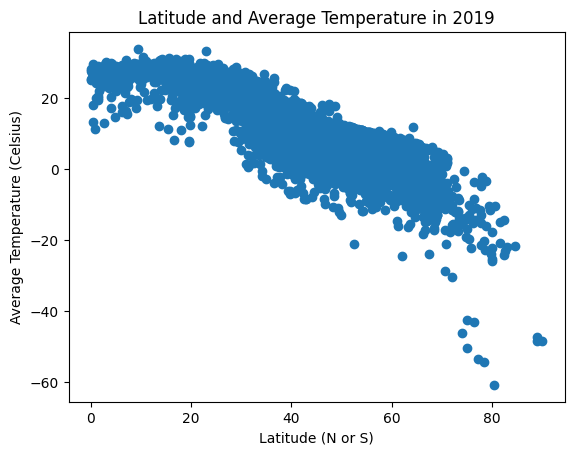

In [3]:
# 평균 기온별 위도
plt.scatter(x='latabs',y='avgtemp',data=landtemps)
plt.xlabel("Latitude (N or S)")
plt.ylabel("Average Temperature (Celsius)")
plt.yticks(np.arange(-60, 40, step=20))
plt.title("Latitude and Average Temperature in 2019")
plt.show()

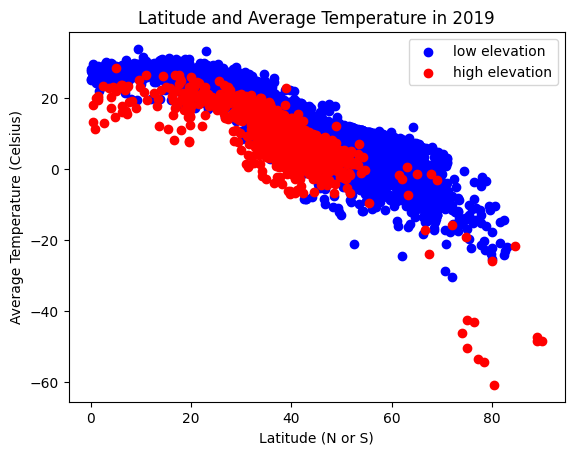

In [7]:
# 고지대를 빨간색으로 표시
low, high=landtemps.loc[landtemps.elevation<=1000],landtemps.loc[landtemps.elevation>1000]
plt.scatter(x='latabs',y='avgtemp',c='blue',data=low)
plt.scatter(x='latabs',y='avgtemp',c='red',data=high)
plt.legend(('low elevation','high elevation'))              # 괄호 두개 필요
plt.xlabel("Latitude (N or S)")
plt.ylabel("Average Temperature (Celsius)")
plt.title("Latitude and Average Temperature in 2019")
plt.show()

### 3차원 산점도
- 고도, 위도, 기온

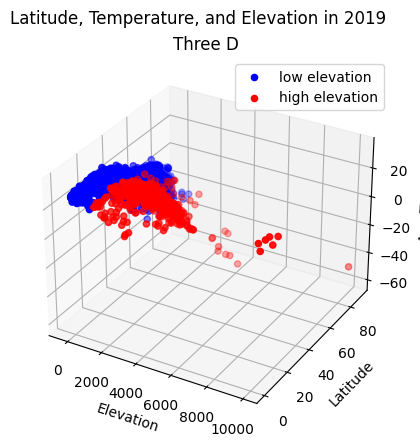

In [9]:
fig = plt.figure()
plt.suptitle("Latitude, Temperature, and Elevation in 2019")
ax = plt.axes(projection='3d')              # 축을 3차원에 투영. scatter3D 메소드로 서브플롯을 사용할 수 있게 됨
ax.set_title('Three D')
ax.set_xlabel("Elevation")
ax.set_ylabel("Latitude")
ax.set_zlabel("Avg Temp")
ax.scatter3D(low.elevation, low.latabs, low.avgtemp, label="low elevation", c="blue")
ax.scatter3D(high.elevation, high.latabs, high.avgtemp, label="high elevation", c="red")
ax.legend()
plt.show()

### 회귀직선 그리기 - regplot

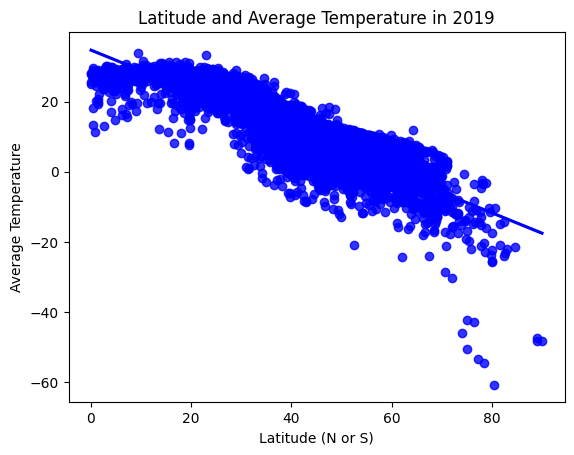

In [11]:
sns.regplot(x='latabs',y='avgtemp',color='blue',data=landtemps)
plt.title("Latitude and Average Temperature in 2019")
plt.xlabel("Latitude (N or S)")
plt.ylabel("Average Temperature")
plt.show()

### lmplot
- seaborn의 regplot과 본질적으로 동일
- 그러나 sns.regplot()이 Axes-level function인 반면 sns.lmplot()은 Figure-level function이라는 가장 큰 차이가 있다.
- hue옵션이 lmplot에만 있다.
- regplot이 자원을 석게 소모한다.

c:\Users\KYW\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\regression.py:582: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


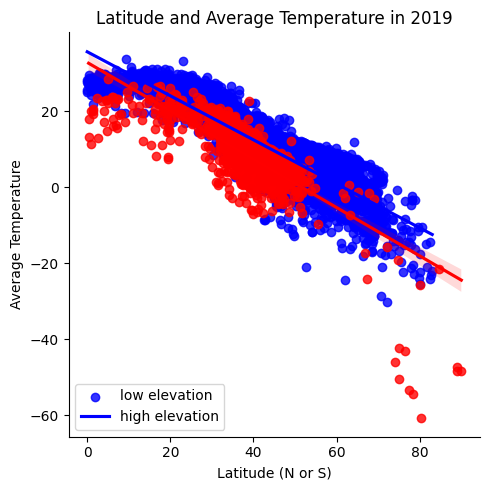

In [14]:
# 관측소 위치 별 회귀직선 따로 그리기
landtemps['elevation_group'] = np.where(landtemps.elevation<=1000,'low','high')
sns.lmplot(x="latabs", y="avgtemp", hue="elevation_group", palette=dict(low="blue", high="red"), legend_out=False, data=landtemps)
plt.xlabel("Latitude (N or S)")
plt.ylabel("Average Temperature")
plt.legend(('low elevation', 'high elevation'), loc='lower left')
plt.yticks(np.arange(-60, 40, step=20))
plt.title("Latitude and Average Temperature in 2019")
plt.tight_layout()
plt.show()

In [18]:
# 회귀직선 밖의 관측소 뽑기
high.loc[(high.latabs>38) & (high.avgtemp>=18),['station','country','latabs','elevation','avgtemp']]
high.loc[(high.latabs>5) & (high.avgtemp<18),['station','country','latabs','elevation','avgtemp']]

low.loc[(low.latabs>47) & (low.avgtemp>=14),['station','country','latabs','elevation','avgtemp']]
low.loc[(low.latabs<50) & (low.avgtemp<-9),['station','country','latabs','elevation','avgtemp']]

,station,country,latabs,elevation,avgtemp
1048,SAANICHTON_CDA,Canada,48.6167,61.0,17.820000
1146,CLOVERDALE_EAST,Canada,49.1167,50.0,14.751667
6830,WINNIBIGOSHISH_DAM,United States,47.4306,400.8,18.370000
7125,WINIFRED,United States,47.5589,988.5,16.310000


## 정리
1. 산점도는 두 연속변수의 관계를 시각화하는 데 뛰어나다.
2. 산점도를 약간 조정하면 세 변수의 관계도 나타낼 수 있다.